<a href="https://colab.research.google.com/github/ever-oli/MLby22/blob/main/A_B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculating required sample size...
Required sample size per group: 3835

A/B TEST RESULTS
T-Test P-Value: 0.0002
Model A 95% CI: [99.77, 101.03]
Model B 95% CI: [101.52, 102.94]
Chi-Square P-Value: 0.0188


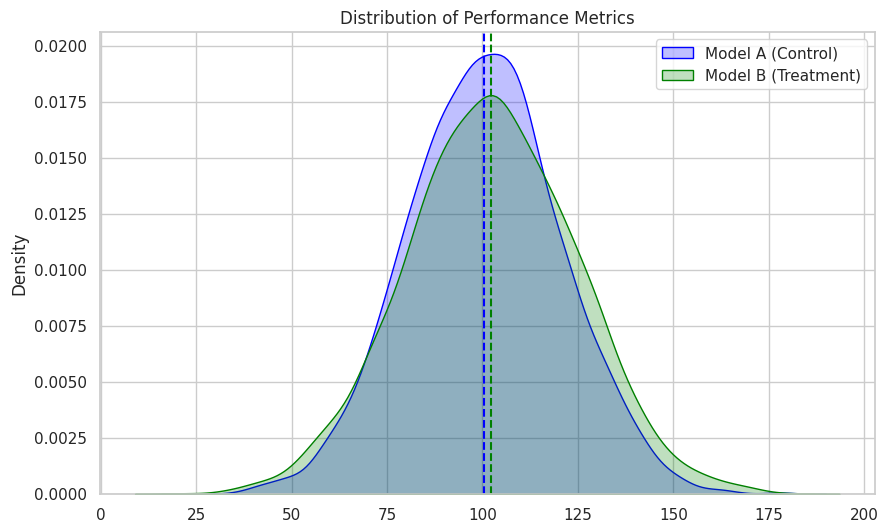

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Power Analysis: Determine Required Sample Size
# Before starting an experiment, we must know how many users we need.
# alpha: Significance level (Type I error)
# power: Probability of detecting an effect if it exists (1 - Type II error)
# effect_size: The minimum detectable effect (difference in means / std_dev)

print("Calculating required sample size...")
alpha = 0.05
power = 0.8
effect_size = sms.proportion_effectsize(0.10, 0.12) # Aiming to detect a 2% lift from 10%

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=power,
    alpha=alpha,
    ratio=1
)

print(f"Required sample size per group: {int(np.ceil(required_n))}\n")

# 2. Synthetic Data Generation
# We simulate Model A (Control) and Model B (Treatment) performance
np.random.seed(42)
n_samples = int(np.ceil(required_n))

# Model A: Mean 100, Std Dev 20
data_a = np.random.normal(loc=100, scale=20, size=n_samples)
# Model B: Mean 103, Std Dev 22 (A slight 3% improvement)
data_b = np.random.normal(loc=103, scale=22, size=n_samples)

# 3. Statistical Testing: T-Test for Continuous Metrics (e.g., Revenue)
# We use Welch's T-Test (equal_var=False) because we don't assume equal variance
t_stat, p_val = stats.ttest_ind(data_a, data_b, equal_var=False)

# 4. Calculating Confidence Intervals
def get_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data) # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin, mean + margin

ci_a = get_ci(data_a)
ci_b = get_ci(data_b)

# 5. Chi-Square Test for Categorical Metrics (e.g., Conversion Rate)
# Simulating binary 'Converted' (1) or 'Not Converted' (0)
conv_a = np.random.binomial(1, 0.10, n_samples)
conv_b = np.random.binomial(1, 0.12, n_samples)

contingency_table = [
    [np.sum(conv_a), n_samples - np.sum(conv_a)],
    [np.sum(conv_b), n_samples - np.sum(conv_b)]
]
chi2, p_val_chi2, _, _ = stats.chi2_contingency(contingency_table)

# 6. Results Visualization
print("="*30)
print("A/B TEST RESULTS")
print("="*30)
print(f"T-Test P-Value: {p_val:.4f}")
print(f"Model A 95% CI: [{ci_a[0]:.2f}, {ci_a[1]:.2f}]")
print(f"Model B 95% CI: [{ci_b[0]:.2f}, {ci_b[1]:.2f}]")
print(f"Chi-Square P-Value: {p_val_chi2:.4f}")
print("="*30)

plt.figure(figsize=(10, 6))
sns.kdeplot(data_a, fill=True, label="Model A (Control)", color="blue")
sns.kdeplot(data_b, fill=True, label="Model B (Treatment)", color="green")
plt.title("Distribution of Performance Metrics")
plt.axvline(np.mean(data_a), color="blue", linestyle="--")
plt.axvline(np.mean(data_b), color="green", linestyle="--")
plt.legend()
plt.show()